# D212 - Data Mining II
### OFM3 Task 2: Dimensionality Reduction Methods
#### Data Mining II — D212
#### PRFA — OFM3
> André Davis
> StudentID: 010630641
> MSDA
>
> Competencies
> 4030.06.5 : Dimensionality Reduction Methods
> The graduate implements dimension reduction methods to identify significant variables.

#### Table of Contents
<ul>
    <li><a href="#research-question">A1: Research Question</a></li>
    <li><a href="#objectives">A2: Objectives and Goals of Analysis</a></li>
    <li><a href="#explination-of-pca">B1: Explanation of Principal Component Analysis (PCA)</a></li>
    <li><a href="#assumptions">B2: Assumptions of PCA Analysis</a></li>
    <li><a href="#identifying-continuous-dataset">C1: Identifying Continuious Dataset Variables</a></li>
    <li><a href="#standardizing-variables">C2: Standardizing Dataset Variables</a></li>
    <li><a href="#principal-component-matrix">D1: Principal Component Matrix</a></li>
    <li><a href="#identify-number-of-components">D2: Identify Total Number of Components with Elbow Rule or Kaiser Criterion</a></li>
    <li><a href="#identify-variance">D3: Identify Variance of each Component</a></li>
    <li><a href="#identify-total-variance">D4: Identify Total Variance Captured by the PCA</a></li>
    <li><a href="#summary-of-data-analysis">D5: Summarize Data Analysis</a></li>
    <li><a href="#code-references">E: Code References</a></li>
    <li><a href="#source-references">F: Source References</a></li>
</ul>

<a id="research-question"></a>
# A1: Research Question

The issue of patient re-admission holds significant importance for various stakeholders, including patients themselves, governing bodies, and the financial aspects concerning both the patients and hospitals. Consequently, it necessitates a comprehensive evaluation from multiple perspectives with an ongoing commitment to enhancing re-admission rates. By effectively reducing re-admission rates, tangible benefits such as cost savings can be realized, not only for the patients but also for the hospitals involved.

In prior analysis scenarios in `D209`, re-admission analysis was conducted employing `Decision Tree Classification`. The hospital aims to explore diverse approaches to enhance accuracy.

**Research Question**

The research question at hand is as follows:

Can we achieve accurate and effective prediction of readmission by utilizing multiple `Decision Tree Classifiers`, specifically known as `Random Forest Classifier`, subsequent to performing Principal Component Analysis (PCA) to reduce the dimensionality of the `WGU Medical Dataset`?

<a id="objectives"></a>
# A2: Objectives and Goals of Analysis

The primary objective of this analysis is to anticipate patient readmission, a critical concern for the WGU Hospital System due to its association with government fines, potential legal liabilities, and the inefficient allocation of hospital resources. By reducing readmissions, the hospital aims to optimize patient care, avoiding the need for repetitive treatments and complications. Ultimately, achieving this goal will not only enhance patient outcomes and satisfaction following their initial hospitalization but also yield substantial positive impacts for both patients and the hospital system as a whole.

<a id="explination-of-pca"></a>
# B1: Explanation of Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a statistical method used to simplify the complexity in high-dimensional (lots of columns) datasets while retaining as much of the original variance as possible. At its core, PCA seeks to identify "directions" or "principal components" in the data that capture the most variance. These components are orthogonal to each other, meaning the first principal component captures the most variance, the second (which is perpendicular to the first) captures the next highest amount, and so on. 

Another way to say this is, "Often, variables will vary together (covary), and some of the variation in one is actually duplicated by variation in another (e.g., restaurant checks and tips). Principal components analysis (PCA) is a technique to discover the way in which numeric variables covary." (Upadhyay et al., 2019).

"Principal component analysis (PCA) is by far the most popular dimensionality reduction algorithm. First it identifies the hyperplane that lies closet to the data, and then it projects the data onto it..." (Geron, 2022).

<a id="assumptions"></a>
# B2: Assumption of PCA Analysis
##### Summarize 1 assumption of PCA.

Principal Component Analysis (PCA) operates on the basis of either covariance matrix or singular value decomposition. It's essential that the dataset used with PCA is of a sufficiently large size. Smaller datasets might be adversely affected by data noise, hindering the accurate depiction of the inherent data structure. In essence, the more comprehensive the data, the better PCA captures the intrinsic relationships among its features.

<a id="identifying-continuous-dataset"></a>
# C1: Identifying Continuous Dataset Variables

Principal Component Analysis (PCA) is specifically tailored for quantitative data, as it produces a matrix based on covariance calculations, which necessitate numerical input. While there exist variants of PCA suited for qualitative (categorical) data, those fall outside the purview of this performance assessment. Therefore, we will focus on the quantitative features from the `medical_clean.csv` dataset provided by [`WGU`](https://www.wgu.edu/).

| Continuous Feature Name | Description ([`WGU Data Dictionary`](https://access.wgu.edu/ASP3/aap/content/jf8rcds032ldktfces9r.html))                                                                                                                                                                                                                     |
|-------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Lat                     | GPS coordinates of patient residence as listed on the billing statement                                                                                                                                                                                     |
| Lng                     | GPS coordinates of patient residence as listed on the billing statement                                                                                                                                                                                     |
| Population              | Population within a mile radius of patient, based on census data                                                                                                                                                                                            |
| Children                | Number of children in the patient’s household as reported in the admissions information might not be children of the patient                                                                                                                                |
| Age                     | Age of the patient as reported in admissions information                                                                                                                                                                                                    |
| Income                  | Annual income of the patient (or primary insurance holder) as reported at time of admission                                                                                                                                                                 |
| VitD_levels             | The patient’s vitamin D levels as measured in ng/mL                                                                                                                                                                                                         |
| Doc_visits              | Number of times the primary physician visited the patient during the initial hospitalization                                                                                                                                                                |
| Full_meals_eaten        | Number of full meals the patient ate while hospitalized (partial meals count as 0, and some patients had more than three meals in a day if requested)                                                                                                       |
| VitD_supp               | The number of times that vitamin D supplements were administered to the patient                                                                                                                                                                             |
| Initial_days            | The number of days the patient stayed in the hospital during the initial visit                                                                                                                                                                              |
| TotalCharge             | The amount charged to the patient daily. This value reflects an average per patient based on the total charge divided by the number of days hospitalized. This amount reflects the typical charges billed to patients not including specialized treatments. |
| Additional_charges      | The average amount charged to the patient for miscellaneous procedures, treatments, medicines, anesthesiology, etc                                                                                                                                          |

In a preliminary assessment, certain features appear to be candidates for removal based on visual inspection. However, to ensure a thorough and systematic evaluation, we will employ the Principal Component Analysis (PCA) method and refrain from manually eliminating any quantitative (numerical) features.

<a id="standardizing-variables"></a>
# C2: Standardizing Dataset Variables

This performance assessment is organized into distinct sections to ensure each step is clearly presented and comprehensively executed. While the entire process can be streamlined using [`Scikit-Learn Pipelines`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline), we've chosen not to employ this method here for the sake of clarity in demonstrating the assessment.

In this analysis, we will import the `medical_clean.csv` dataset, which is provided by [`WGU`](https://www.wgu.edu/), and proceed with its standardization. For this standardization phase, we will focus solely on the quantitative (numerical) values as outlined in Section `C1`. This process encompasses two primary steps:

   1. **Standardization**: This involves scaling all values such that they have a mean of 0 and a standard deviation (std) of 1. This transformation will be executed using the [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) library.
   
   2. **Covariance Matrix Generation**: The resulting matrix will help us identify if any of the features (columns) display perfect correlation. In cases of perfect correlation between features, redundancy is evident; hence, one feature can be retained while the correlated counterpart is discarded.

In [20]:
from typing import List
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

medical_clean = pd.read_csv('./medical_clean.csv', index_col=0)
#print(medical_clean)

#These are the columns stated within Section C1 of the performance assessment
quantitative_columns = [
    'Lat',
    'Lng',
    'Population',
    'Children',
    'Age',
    'Income',
    'VitD_levels',
    'Doc_visits',
    'Full_meals_eaten',
    'vitD_supp',
    'Initial_days',
    'TotalCharge',
    'Additional_charges'
]

x_features = medical_clean[quantitative_columns].copy()
y_target = medical_clean['ReAdmis'].copy()

print('Quantitative Feature')
print(x_features)

print('Target Variable')
print(y_target)

Quantitative Feature
                Lat        Lng  Population  Children  Age    Income   
CaseOrder                                                             
1          34.34960  -86.72508        2951         1   53  86575.93  \
2          30.84513  -85.22907       11303         3   51  46805.99   
3          43.54321  -96.63772       17125         3   53  14370.14   
4          43.89744  -93.51479        2162         0   78  39741.49   
5          37.59894  -76.88958        5287         1   22   1209.56   
...             ...        ...         ...       ...  ...       ...   
9996       36.42886  -78.23716        4762         2   25  45967.61   
9997       39.43609  -74.87302        1251         4   87  14983.02   
9998       36.36655  -87.29988         532         3   45  65917.81   
9999       44.10354 -102.01590         271         3   43  29702.32   
10000      40.49998  -80.19959       41524         8   70  62682.63   

           VitD_levels  Doc_visits  Full_meals_eaten  v

In [21]:
'''
Standardization Process:
    X features will be standardized to prevent larger values from dominating the smaller features
        1. Fit the data model 
        2. Transform the data into the standardized format.
        3. Verify that the standardization happened
        
    NOTE: there is a "fit_transform" function but I have separated these steps for clarity.
'''

def standardize_features(features: pd.DataFrame, columns: List[str]) -> pd.DataFrame:
    """Function for standardizing the features as this process can be repeated"""
    standard_scaler = StandardScaler()
    standard_scaler.fit(features)
    
    scaled_data = standard_scaler.transform(features.copy())
    
    scaled_features = pd.DataFrame(scaled_data, columns=columns)
    return scaled_features

x_features_scaled = standardize_features(x_features, quantitative_columns)

verification_data = {
    'Feature': x_features_scaled.columns,
    'Scaled Mean': round(x_features_scaled.mean(), 4),
    'Scaled Std': round(x_features_scaled.std(), 4)
}

verification_table = pd.DataFrame(verification_data)
verification_table

,Feature,Scaled Mean,Scaled Std
Lat,Lat,-0.0,1.0001
Lng,Lng,0.0,1.0001
Population,Population,-0.0,1.0001
Children,Children,0.0,1.0001
Age,Age,0.0,1.0001
Income,Income,0.0,1.0001
VitD_levels,VitD_levels,-0.0,1.0001
Doc_visits,Doc_visits,0.0,1.0001
Full_meals_eaten,Full_meals_eaten,-0.0,1.0001
vitD_supp,vitD_supp,0.0,1.0001


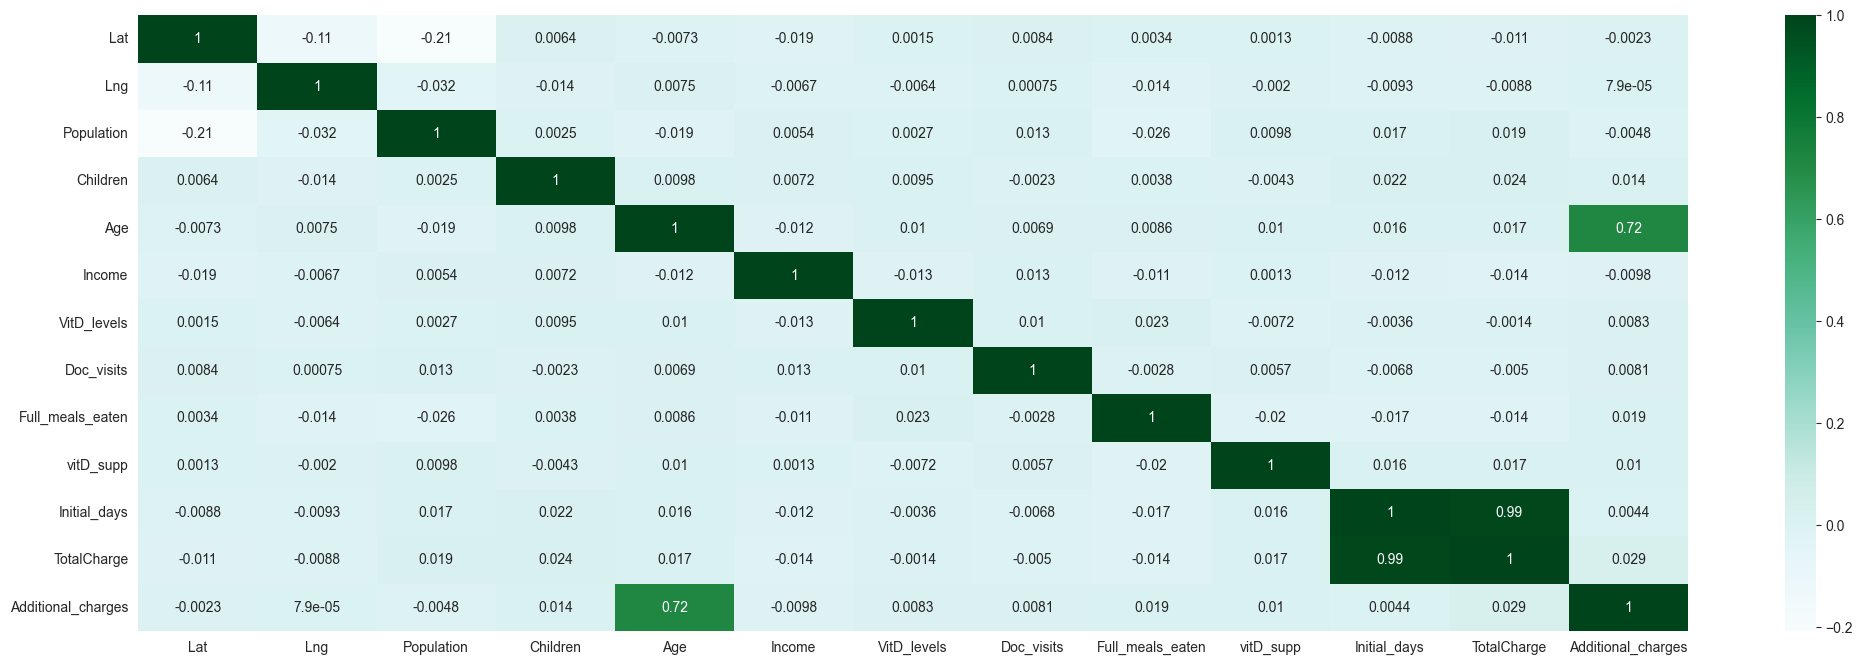

In [22]:
'''
Covariance Matrix
    Is a matrix that provides linear relationships between features (columns). A positive covariance value indicates that as one variable increases, the other tends to increase as well, while a negative value indicates that as one variable increases, the other tends to decrease. If the covariance is zero, it suggests that there's no linear relationship between those two variables.
    
To visually add
'''

def display_covariance_matrix(scaled_features: pd.DataFrame, filename: str) -> pd.DataFrame:
    features_covariance_matrix = scaled_features.cov()
    #styled_features_covariance_matrix = features_covariance_matrix.style.background_gradient(cmap='BuGn')
    
    plt.figure(figsize=(25, 8))  # Adjust the figure size as needed
    sns.heatmap(features_covariance_matrix, cmap='BuGn', annot=True)
    plt.savefig(filename)
    plt.show()
    
    return features_covariance_matrix

covariance_matrix = display_covariance_matrix(x_features_scaled, './original-scaled-features-covariance-matrix.png')



###### Results of Co-Variance Matrix

The feature `TotalCharge`, representing daily charges, exhibits an extremely high correlation of 99% (0.99) with `Initial_days`, which denotes the duration of the initial hospital visit. Given the redundancy due to this near-perfect correlation, one of these features should be excluded. We will opt to remove 'Initial_days', positing that 'Additional_charges' could be more pertinent when considered alongside 'Total_charges'. After selecting an item for removal, the covariance matrix should be recalculated to ensure accuracy. It seems within the data community that 80% (.8) or 90 (.9)% is grounds for removal. It should be noted that `Additional_charges` was high at 72% (.72) but was below the 80% threshold and was not removed.

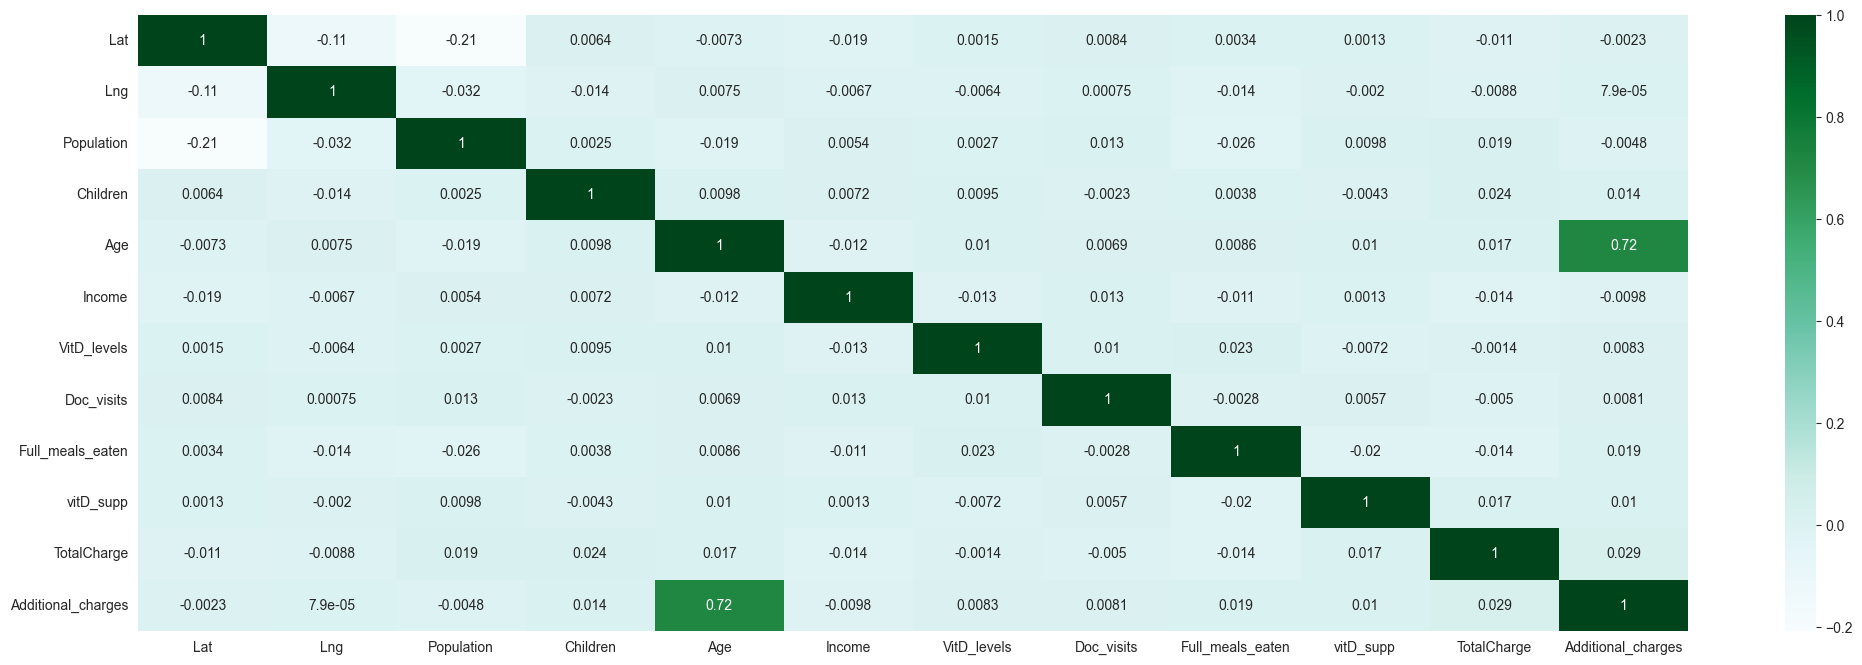

In [23]:
quantitative_columns.remove('Initial_days')
adjusted_x_features = medical_clean[quantitative_columns].copy() 

x_features_scaled = standardize_features(adjusted_x_features, quantitative_columns)

adjusted_covariance_matrix = display_covariance_matrix(x_features_scaled, './scaled-features-covariance-matrix-removal.png')

<a id="principal-component-matrix"></a>
# D1: Principal Component Matrix

The Principal Component is next in line following the Standardization of the dataset and removal of the highly correlated feature. We will fit the model and transform the data.

In [ ]:
n_components = 12

pca_component_labels = list()
for i in range(1, n_components + 1): #range is not inclusive of stop value so +1
    pca_component_labels.append(f'PC{i}')

<a id="identify-number-of-components"></a>
# D2: Identify Total Number of Components with Elbow Rule or Kaiser Criterion

<a id="identify-variance"></a>
# D3: Identify Variance of each Component

<a id="identify-total-variance"></a>
# D4: Identify Total Variance Captured by the PCA

<a id="summary-of-data-analysis"></a>
# D5: Summarize Data Analysis

<a id="code-references"></a>
# E1: Code References

<a id="source-references"></a>
# F1: Source References

 * Bruce, P., Bruce, A., &amp; Gedeck, P. (2020). Practical statistics for data scientists: 50+ essential concepts using r and python. O’Reilly Media. <br /><br />
 * Upadhyay, S., Stephenson, A. L., &amp; Smith, D. G. (2019). Readmission rates and Their Impact on Hospital Financial Performance: A Study of Washington Hospitals. Inquiry : a journal of medical care organization, provision and financing. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6614936/  <br /><br />
 * Geron, A. (2022). Hands-on machine learning with scikit-learn, Keras, and tensorflow 3E: Concepts, tools, and techniques to build Intelligent Systems. O’Reilly Media.  